## **VISÃO COMPUTACIONAL - AULA 17**

**Objetivos da aula:**

*   apresentar e praticar com programas genéricos em PyTorch
*   apresentar e praticar com aplcações de PyTorch em Processamento de Imagens



**FUNDAMENTOS DE PYTORCH**

PyTorch (https://pytorch.org/) é uma biblioteca de aprendizado de máquina de código aberto baseada na biblioteca Torch, usada para aplicativos como Visão Computacional e Processamento de Linguagem Natural, desenvolvida principalmente pelo laboratório AI Research do Facebook (FAIR). É um software gratuito e de código aberto lançado sob a licença BSD modificada. Embora a interface Python seja mais polida e o foco principal de desenvolvimento, PyTorch também tem uma interface C ++.

Uma série de artefatos de software Deep Learning são construídas em cima do PyTorch, incluindo Tesla Autopilot , Uber's Pyro, HuggingFace's Transformers, PyTorch Lightning e Catalyst. 

O PyTorch oferece dois recursos de alto nível:

*   Computação de tensor (como NumPy) com forte aceleração por meio de unidades de processamento gráfico (GPU)
*   Redes neurais profundas construídas em um sistema de diferenciação automática baseado em fita




**PYTORCH EM CPU**



In [8]:
!pip install torch===0.1.2 torchvision===0.8.1 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html

    ERROR: Command errored out with exit status 1:
     command: 'c:\users\arfom\appdata\local\programs\python\python37-32\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\arfom\\AppData\\Local\\Temp\\pip-install-5dsq36xf\\torch\\setup.py'"'"'; __file__='"'"'C:\\Users\\arfom\\AppData\\Local\\Temp\\pip-install-5dsq36xf\\torch\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\arfom\AppData\Local\Temp\pip-pip-egg-info-wk6wfnhe'
         cwd: C:\Users\arfom\AppData\Local\Temp\pip-install-5dsq36xf\torch\
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\arfom\AppData\Local\Temp\pip-install-5dsq36xf\torch\setup.py", line 12, in <module>
        from tools.setup_helpers.env import check_env_flag
    ModuleNotFoundError: No mod

In [6]:
!c:\users\arfom\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1


In [3]:
import torch
import numpy
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'torch'

In [3]:
x = torch.ones([3, 2])
print(x)
y = torch.transpose(torch.ones([3, 2]),0,1)
print(y)
z = torch.matmul(x,y)
print(z)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


**PYTORCH EM GPU**

In [5]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
Tesla T4


In [2]:
cuda0 = torch.device('cuda:0')
a = torch.ones(3, 2, device=cuda0) 
b = torch.ones(3, 2, device=cuda0) 
c = a + b
print(c)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]], device='cuda:0')


#### **PROCESSAMENTO DE IMAGENS COM PYTORCH**

**FUNDAMENTOS DE PYTORCH**

PyTorch possui diversas formas de representação de imagens, assim como operações otimizadas para GPU. Este primeiro exemplo mostra como carregar e exibir imagens.

Image size:  torch.Size([512, 512, 3])


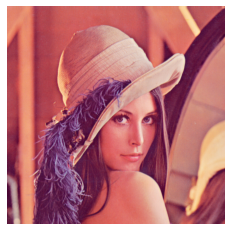

In [21]:
import torch, matplotlib
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Obtenção da imagem
img_url = 'http://optipng.sourceforge.net/pngtech/img/lena.png'
img = imageio.imread(img_url)

# Transformação da imagem em tensor
img = torch.tensor(img, dtype=torch.float) / 255.0  

# Propriedades da imagem
print('Image size: ', img.shape)

# Exibe a imagem
def display_image(img):
  plt.figure(); plt.imshow(img.cpu())
  plt.grid(False);  plt.axis('off'); plt.show()
  
display_image(img)

#### **EXERCÍCIO**

Converter o código acima para ser executado dentro de uma GPU do Google Colab.

In [ ]:
#implemente sua solução aqui

O próximo exemplo mostra como efetuar e operar com os diversos canais de uma imagem:

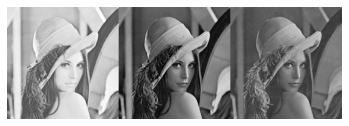

In [17]:
r_image = img[:, :, 0]
g_image = img[:, :, 1]
b_image = img[:, :, 2]
display_image(torch.cat((r_image, g_image, b_image), 1))

#### **EXERCÍCIO**

Converter o código acima para ser executado dentro de uma GPU do Google Colab.

In [ ]:
#implemente sua solução aqui.

O próximo exemplo mostra como calcular histogramas.

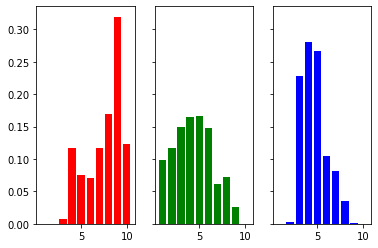

In [20]:
r_image = img[:, :, 0]
g_image = img[:, :, 1]
b_image = img[:, :, 2]

# Calcula os hitogramas em cada canal.
hist_r = torch.histc(r_image, bins = 10, min = 0.0, max = 1.0)
hist_g = torch.histc(g_image, bins = 10, min = 0.0, max = 1.0)
hist_b = torch.histc(b_image, bins = 10, min = 0.0, max = 1.0)

# Normaliza os histogramas.
hist_r = hist_r.div(hist_r.sum())
hist_g = hist_g.div(hist_g.sum())
hist_b = hist_b.div(hist_b.sum())

# Exibe os histogramas.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True);
ax1.bar(np.linspace(1.0, 10.0, num = 10), hist_r.numpy(), color = 'r');
ax2.bar(np.linspace(1.0, 10.0, num = 10), hist_g.numpy(), color = 'g');
ax3.bar(np.linspace(1.0, 10.0, num = 10), hist_b.numpy(), color = 'b');

#### **EXERCÍCIO**

Converter o código acima para ser executado dentro de uma GPU do Google Colab.

In [ ]:
#implemente sua solução aqui

In [ ]:
brighter_image = (2.1 * img).clamp_(0, 1)
darker_image = (0.5 * img)
display_image(torch.cat((img, brighter_image, darker_image), 1))

#### **EXERCÍCIO**

Converter o código acima para ser executado dentro de uma GPU do Google Colab.

In [ ]:
#implemente sua solução aqui

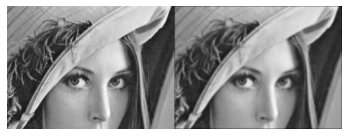

In [23]:
gray_img = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3.0
input_image = gray_img[150:340, 160:420]


kv = 1.0 / 9.0
blur_weights = torch.Tensor([[kv, kv, kv],
                             [kv, kv, kv],
                             [kv, kv, kv]])


def SingleChannelConvolution(input_image, kernel):
    import torch.nn.functional as F
    kernel = kernel.contiguous()
    output = F.conv2d(input_image.unsqueeze(0).unsqueeze(0), 
                      kernel.unsqueeze(0).unsqueeze(0), padding = 1)
    return output.squeeze()


output_image = SingleChannelConvolution(input_image, blur_weights)

display_image(torch.cat((input_image, output_image), 1))

#### **EXERCÍCIO**

Converter o código acima para ser executado dentro de uma GPU do Google Colab.

In [ ]:
#implemente sua solução aqui